##### Analyse Cleaned Datasets

In [6]:
import sys
sys.path.append("..")  # go back one folder

from main import run_summary

df = run_summary()
df.to_clipboard(index=False, excel=True, sep='\t')



Dataset  Jumlah Atribut  Jumlah Instance  Jumlah Defective  Jumlah Tidak Defective Batas Atas (Max) Batas Bawah (Min)
    CM1              37              327                42                     285       2109679.46               0.0
    JM1              21             7720              1612                    6108      31079782.27               0.0
    KC1              21             1162               294                     868        324803.51               0.0
    KC3              39              194                36                     158        582830.35               0.0
    KC4               0                0                 0                       0                -                 -
    MC1              38             1952                36                    1916      31159817.68               0.0
    MC2              39              124                44                      80        991629.56               0.0
    MW1              37              250                

##### Combine Datasets on the same Attributes

In [ ]:
from main import merge_datasets

merged = merge_datasets()
merged.head()



CM1.arff includes label column: defective → renamed to 'defective'
JM1.arff includes label column: label → renamed to 'defective'
KC1.arff includes label column: defective → renamed to 'defective'
KC3.arff includes label column: defective → renamed to 'defective'
⚠️ Skipping KC4.arff — too few columns (1)
MC1.arff includes label column: defective → renamed to 'defective'
MC2.arff includes label column: defective → renamed to 'defective'
MW1.arff includes label column: defective → renamed to 'defective'
PC1.arff includes label column: defective → renamed to 'defective'
PC2.arff includes label column: defective → renamed to 'defective'
PC3.arff includes label column: defective → renamed to 'defective'
PC4.arff includes label column: defective → renamed to 'defective'
PC5.arff includes label column: defective → renamed to 'defective'
✅ Final common columns: ['branch_count', 'cyclomatic_complexity', 'defective', 'design_complexity', 'essential_complexity', 'halstead_content', 'halstead_dif

,defective,loc_total,halstead_prog_time,num_operands,loc_code_and_comment,num_operators,loc_executable,halstead_level,branch_count,design_complexity,...,essential_complexity,loc_comments,halstead_difficulty,num_unique_operators,halstead_error_est,halstead_content,num_unique_operands,halstead_effort,cyclomatic_complexity,halstead_volume
0,0,9.0,12.61,5.0,0.0,10.0,9.0,0.23,3.0,1.0,...,1.0,8.0,4.38,7.0,0.02,11.86,4.0,227.03,2.0,51.89
1,0,13.0,87.20,10.0,2.0,22.0,11.0,0.08,3.0,1.0,...,1.0,2.0,12.00,12.0,0.04,10.90,5.0,1569.59,2.0,130.80
2,0,109.0,5551.65,150.0,5.0,222.0,104.0,0.02,35.0,7.0,...,13.0,70.0,41.38,32.0,0.80,58.36,58.0,99929.77,18.0,2414.97
3,1,41.0,546.69,50.0,0.0,79.0,41.0,0.08,7.0,3.0,...,3.0,12.0,13.19,19.0,0.25,56.52,36.0,9840.36,4.0,745.80
4,0,41.0,369.73,29.0,14.0,64.0,27.0,0.07,15.0,6.0,...,4.0,22.0,13.74,18.0,0.16,35.27,19.0,6655.21,8.0,484.48


Didapatkan 21 kolom yang sama.

In [22]:
print(list(merged.columns))

['defective', 'loc_total', 'halstead_prog_time', 'num_operands', 'loc_code_and_comment', 'num_operators', 'loc_executable', 'halstead_level', 'branch_count', 'design_complexity', 'halstead_length', 'essential_complexity', 'loc_comments', 'halstead_difficulty', 'num_unique_operators', 'halstead_error_est', 'halstead_content', 'num_unique_operands', 'halstead_effort', 'cyclomatic_complexity', 'halstead_volume']


##### Exploratory Data Analysis (EDA)

Number of Instance dan Label Distribution

In [3]:
print("Jumlah total instance:", len(merged))
print("\nDistribusi label 'defective':")
print(merged['defective'].value_counts())
print("\nProporsi:")
print(merged['defective'].value_counts(normalize=True))


Jumlah total instance: 17147

Distribusi label 'defective':
defective
0    14223
1     2924
Name: count, dtype: int64

Proporsi:
defective
0    0.829475
1    0.170525
Name: proportion, dtype: float64


Describe Feature Statistic

In [4]:
merged.describe()


,essential_complexity,halstead_effort,halstead_level,cyclomatic_complexity,branch_count,halstead_length,halstead_error_est,loc_code_and_comment,num_unique_operands,loc_comments,...,design_complexity,num_unique_operators,loc_executable,num_operands,defective,num_operators,halstead_prog_time,halstead_volume,halstead_difficulty,loc_total
count,17147.000000,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,...,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,1.714700e+04,17147.000000,17147.000000,17147.000000
mean,3.073366,5.189755e+04,0.121709,6.338893,11.356214,152.703738,0.310877,1.880795,21.258471,5.648743,...,3.963259,13.334811,32.280982,61.801773,0.170525,90.901965,2.883197e+03,932.634133,17.469136,40.143465
std,6.848112,5.408770e+05,0.136436,12.993317,23.569598,406.148004,1.148952,8.097088,36.219515,19.598081,...,8.265775,8.672041,76.994408,158.501992,0.376105,250.045319,3.004872e+04,3446.786075,21.648137,84.997364
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,9.382300e+02,0.050000,2.000000,3.000000,32.000000,0.040000,0.000000,7.000000,0.000000,...,1.000000,8.000000,8.000000,13.000000,0.000000,19.000000,5.212000e+01,132.000000,6.750000,11.000000
50%,1.000000,3.900840e+03,0.080000,3.000000,5.000000,68.000000,0.110000,0.000000,14.000000,0.000000,...,2.000000,12.000000,16.000000,27.000000,0.000000,40.000000,2.167100e+02,320.430000,12.000000,21.000000
75%,3.000000,1.580891e+04,0.140000,7.000000,12.000000,146.000000,0.260000,1.000000,25.000000,5.000000,...,4.000000,17.000000,33.000000,60.000000,0.000000,87.000000,8.782700e+02,780.440000,21.380000,41.000000
max,290.000000,3.115982e+07,2.000000,470.000000,826.000000,15682.000000,58.220000,558.000000,2241.000000,901.000000,...,402.000000,411.000000,2824.000000,5169.000000,1.000000,10862.000000,1.731101e+06,174650.290000,833.780000,3442.000000


Feature Correlation Heatmap

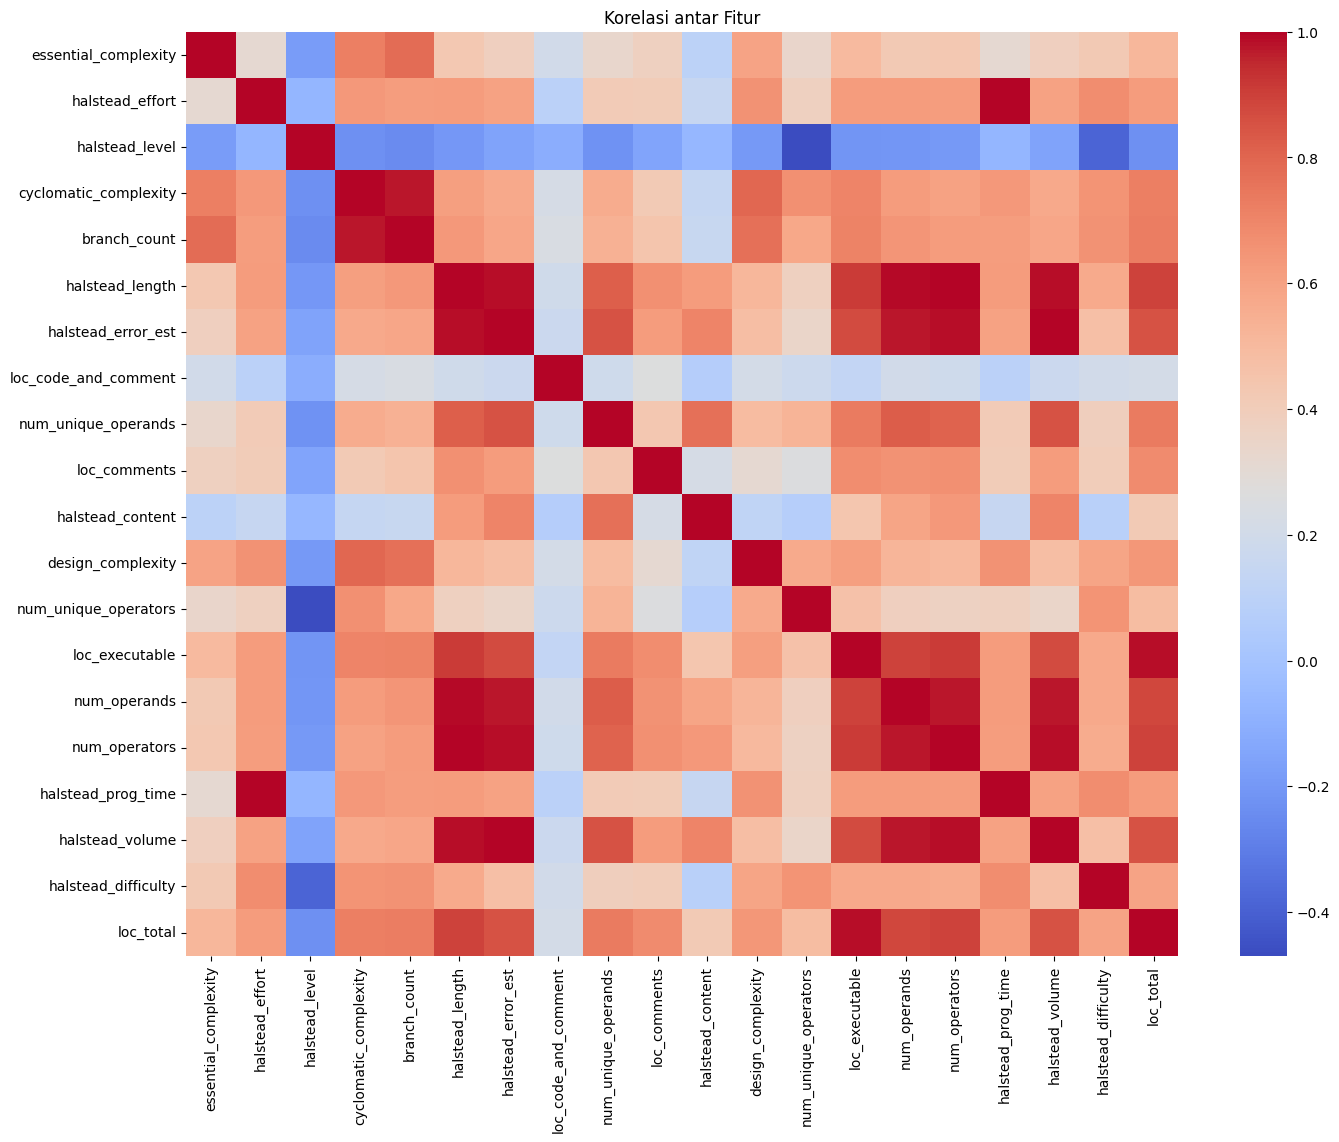

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(merged.drop(columns=["defective"]).corr(), cmap="coolwarm", annot=False)
plt.title("Korelasi antar Fitur")
plt.show()

Feature Correlation to Defective Label

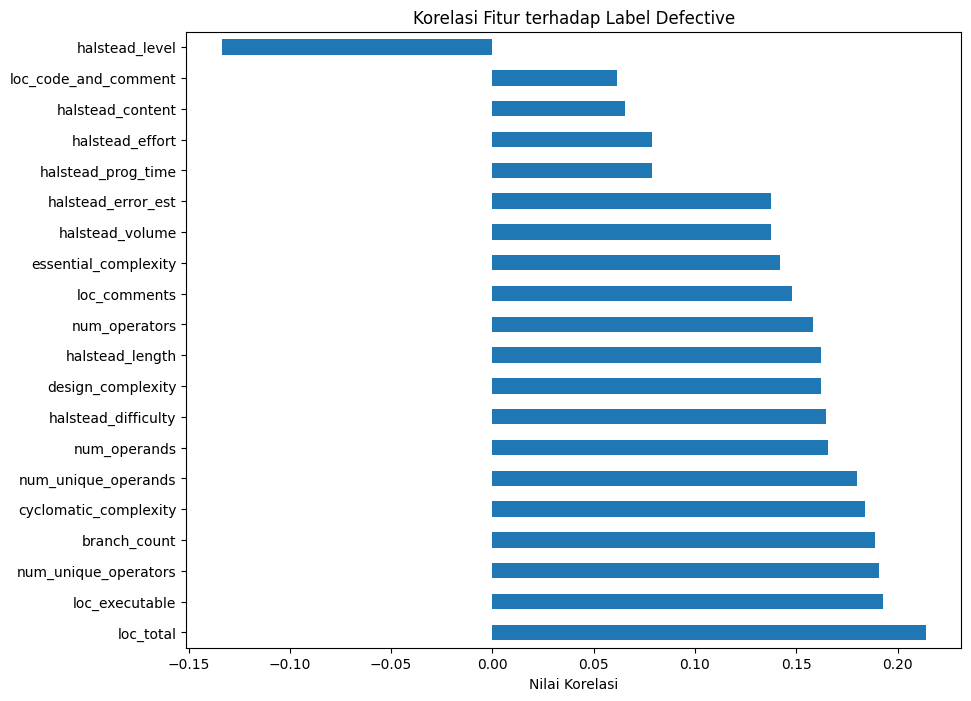

In [6]:
label_corr = merged.corr()["defective"].drop("defective").sort_values(ascending=False)
label_corr.plot(kind="barh", figsize=(10, 8), title="Korelasi Fitur terhadap Label Defective")
plt.xlabel("Nilai Korelasi")
plt.show()

##### Oversampling

Imports

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Separate Feature and Defective Label

In [4]:
X = merged.drop(columns=["defective"])
y = merged["defective"]

Oversampling with SMOTE

In [5]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [6]:
print("Sebelum Oversampling:")
print(y.value_counts())

print("\nSetelah Oversampling:")
print(pd.Series(y_resampled).value_counts())


Sebelum Oversampling:
defective
0    14223
1     2924
Name: count, dtype: int64

Setelah Oversampling:
defective
0    14223
1    14223
Name: count, dtype: int64


Visualization

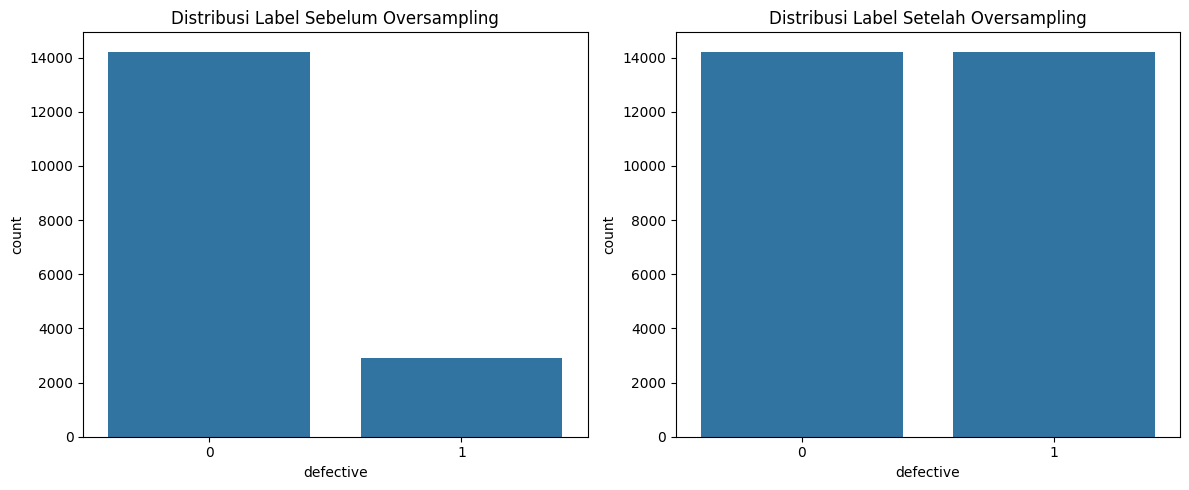

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Distribusi Label Sebelum Oversampling")

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title("Distribusi Label Setelah Oversampling")

plt.tight_layout()
plt.show()


Store the Results

In [8]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["defective"] = y_resampled


##### Normalization

Normalization with Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_resampled.drop(columns=['defective']))

# Simpan label
y_scaled = df_resampled['defective']


In [10]:
# Konversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=df_resampled.drop(columns=['defective']).columns)

# Tampilkan beberapa baris pertama
X_scaled_df.head()


,loc_total,halstead_prog_time,num_operands,loc_code_and_comment,num_operators,loc_executable,halstead_level,branch_count,design_complexity,halstead_length,essential_complexity,loc_comments,halstead_difficulty,num_unique_operators,halstead_error_est,halstead_content,num_unique_operands,halstead_effort,cyclomatic_complexity,halstead_volume
0,-0.416458,-0.136603,-0.394964,-0.295058,-0.367712,-0.355275,1.047053,-0.396302,-0.388964,-0.379866,-0.334378,-0.006759,-0.659209,-0.748829,-0.301091,-0.288966,-0.545704,-0.136603,-0.372014,-0.302999
1,-0.381048,-0.134515,-0.370412,-0.034387,-0.329849,-0.335739,-0.208531,-0.396302,-0.388964,-0.347081,-0.334378,-0.233288,-0.350996,-0.269501,-0.287172,-0.297078,-0.521814,-0.134515,-0.372014,-0.284693
2,0.468790,0.018441,0.317064,0.356619,0.301198,0.572709,-0.710764,0.635905,0.173382,0.308618,1.029895,2.334043,0.837362,1.647814,0.241745,0.103964,0.744315,0.018441,0.553284,0.245198
3,-0.133178,-0.121653,-0.173990,-0.295058,-0.150001,-0.042691,-0.208531,-0.267276,-0.201515,-0.160014,-0.106999,0.144260,-0.302863,0.401559,-0.141024,0.088416,0.218752,-0.121653,-0.256352,-0.142023
4,-0.133178,-0.126607,-0.277111,1.529636,-0.197329,-0.179447,-0.292236,-0.009224,0.079657,-0.229441,0.006690,0.521809,-0.280617,0.305694,-0.203659,-0.091149,-0.187365,-0.126606,-0.025027,-0.202645


##### Without Dimension Reduction -> Classfication

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# 1️⃣ Split langsung dari X_scaled (tanpa PCA)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# 2️⃣ Inisialisasi model (sama seperti sebelumnya)
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

# 3️⃣ Evaluasi model
results = []

for name, model in models.items():
    model.fit(X_train_raw, y_train)  # ← langsung pakai X_train_raw
    y_pred = model.predict(X_test_raw)  # ← langsung pakai X_test_raw

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} ====")
    print(classification_report(y_test, y_pred))

# 4️⃣ Simpan hasil ke DataFrame
import pandas as pd
df_results = pd.DataFrame(results)
print("\n✅ Hasil evaluasi tanpa reduksi dimensi:")
print(df_results)


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2845
           1       0.70      0.57      0.63      2845

    accuracy                           0.66      5690
   macro avg       0.67      0.66      0.66      5690
weighted avg       0.67      0.66      0.66      5690


==== SVM ====
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      2845
           1       0.71      0.61      0.65      2845

    accuracy                           0.68      5690
   macro avg       0.68      0.68      0.68      5690
weighted avg       0.68      0.68      0.68      5690


==== KNN ====
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      2845
           1       0.73      0.88      0.80      2845

    accuracy                           0.78      5690
   macro avg       0.79      0.78      0.77      5690
weighted avg 

Copy to Clipboard

In [33]:
# Tampilkan dalam bentuk DataFrame
df_results = pd.DataFrame(results)

# Urutkan berdasarkan F1-Score tertinggi
df_results_sorted = df_results.sort_values(by="F1-Score", ascending=False)

# Tampilkan hasil akhir
print("\n✅ Hasil Evaluasi Model Tanpa PCA dan t-SNE:")
print(df_results_sorted.to_string(index=False))

df_results_sorted.to_clipboard(index=False, excel=True, sep='\t')




✅ Hasil Evaluasi Model Tanpa PCA dan t-SNE:
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.894376   0.905347 0.880844  0.892927
           CatBoost  0.897188   0.952000 0.836555  0.890552
            XGBoost  0.894376   0.934211 0.848506  0.889298
  Gradient Boosting  0.860984   0.893487 0.819684  0.854995
                KNN  0.775044   0.727802 0.878735  0.796178
           AdaBoost  0.764675   0.743847 0.807381  0.774313
                SVM  0.679262   0.710223 0.605624  0.653766
Logistic Regression  0.664499   0.700858 0.573989  0.631111


##### PCA

PCA with Maximum Component

In [12]:
from sklearn.decomposition import PCA

# Jumlah maksimum komponen = jumlah fitur
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)


Cumulative Explained Variance

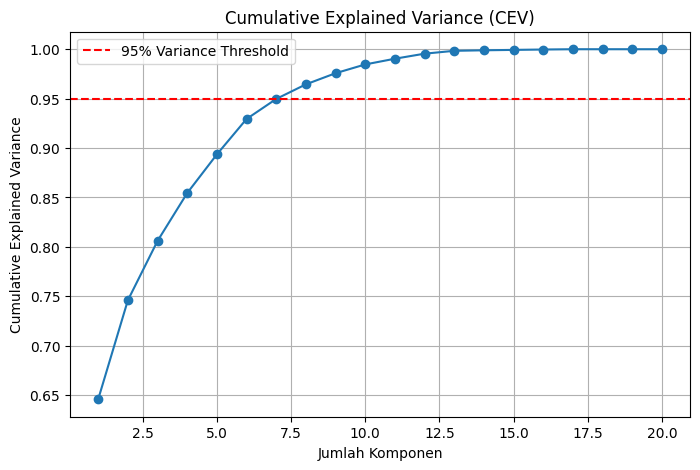

In [13]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance (CEV)')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()


Variance Comparison

In [14]:
pca_variance_df = pd.DataFrame({
    'Komponen ke-': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': explained_variance
})

pca_variance_df.head(19)  # Atau print semua


,Komponen ke-,Explained Variance Ratio,Cumulative Variance
0,PC1,6.458424e-01,0.645842
1,PC2,1.001465e-01,0.745989
2,PC3,6.002242e-02,0.806011
3,PC4,4.844555e-02,0.854457
4,PC5,3.911467e-02,0.893572
5,PC6,3.582747e-02,0.929399
6,PC7,2.027145e-02,0.949671
7,PC8,1.477489e-02,0.964445
8,PC9,1.127887e-02,0.975724
9,PC10,8.871174e-03,0.984595


Chosen N Component for (0.95 - 1.0)

In [15]:
thresholds = [0.95, 0.96, 0.97, 0.98, 0.99, 1.00]
epsilon = 1e-8

n_components_list = []

for threshold in thresholds:
    idx = np.argmax(explained_variance >= (threshold - epsilon))
    n_components = idx + 1
    n_components_list.append((threshold, n_components))

# Tampilkan hasilnya
for threshold, n in n_components_list:
    print(f"Untuk threshold {threshold*100:.0f}%, jumlah komponen: {n}")


Untuk threshold 95%, jumlah komponen: 8
Untuk threshold 96%, jumlah komponen: 8
Untuk threshold 97%, jumlah komponen: 9
Untuk threshold 98%, jumlah komponen: 10
Untuk threshold 99%, jumlah komponen: 11
Untuk threshold 100%, jumlah komponen: 18


10 Components for Classification Later

In [16]:
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA

# # Split dulu
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(
#     X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
# )

# # Fit PCA hanya di training
# pca = PCA(n_components=19)
# X_train_pca = pca.fit_transform(X_train_raw)

# # Transform testing pakai PCA dari training
# X_test_pca = pca.transform(X_test_raw)



PC1 and PC2 Visualization

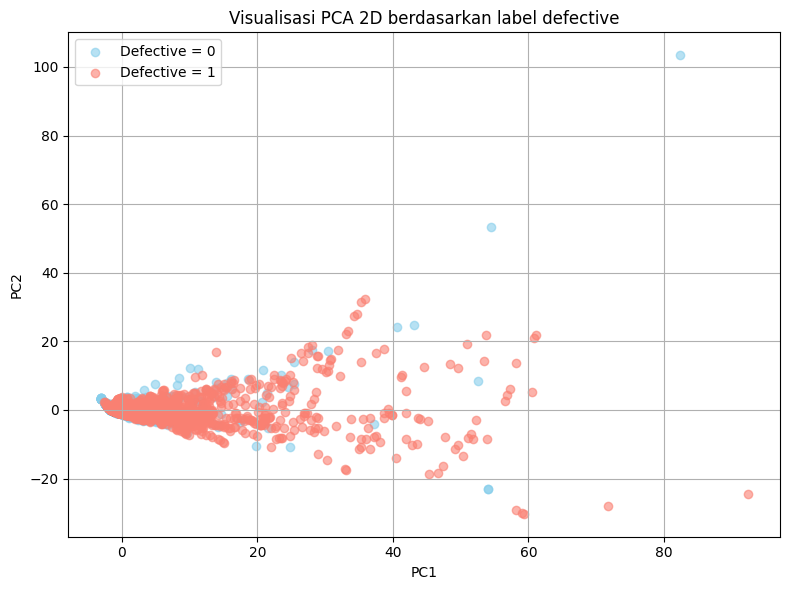

In [17]:
import matplotlib.pyplot as plt

# Ambil hanya dua komponen pertama dari PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
pca_2d_df = pd.DataFrame(data=X_pca_2d, columns=["PC1", "PC2"])
pca_2d_df["defective"] = y_scaled.values

# Scatter plot
plt.figure(figsize=(8, 6))
colors = {0: 'skyblue', 1: 'salmon'}

for label in [0, 1]:
    subset = pca_2d_df[pca_2d_df["defective"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], 
                label=f"Defective = {label}", 
                alpha=0.6, c=colors[label])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA 2D berdasarkan label defective")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### t-SNE

t-SNE


▶️ Perplexity = 5


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
  Silhouette Score : 0.0683
  Davies-Bouldin Index : 2.6775

▶️ Perplexity = 10


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
  Silhouette Score : 0.0699
  Davies-Bouldin Index : 2.6833

▶️ Perplexity = 30


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
  Silhouette Score : 0.0777
  Davies-Bouldin Index : 2.7202

▶️ Perplexity = 50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Silhouette Score : 0.0779
  Davies-Bouldin Index : 2.7152


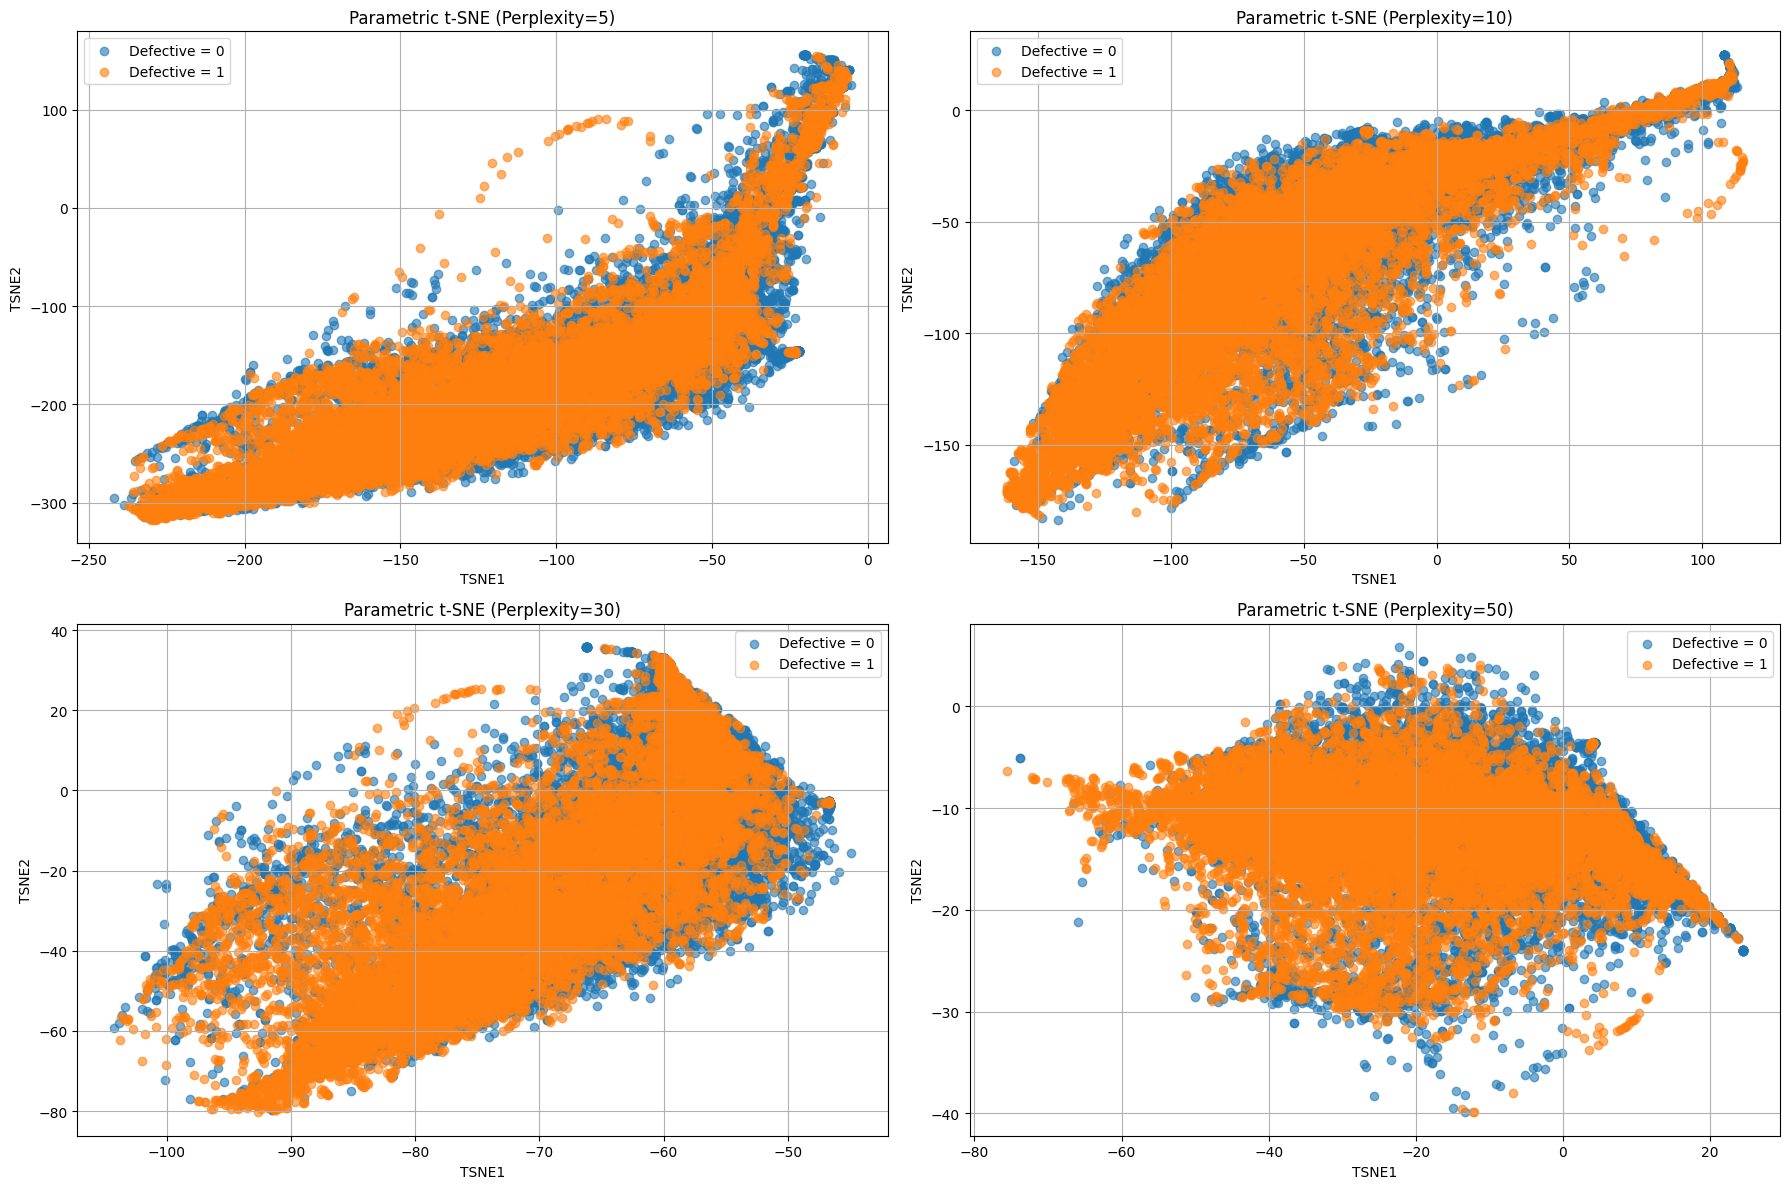

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from parametric_tSNE import Parametric_tSNE


# Daftar nilai perplexity yang ingin diuji
perplexities = [5, 10, 30, 50]

plt.figure(figsize=(18, 12))

# Simpan hasil coherence metrics
coherence_results = []

for i, perplexity in enumerate(perplexities, 1):
    print(f"\n▶️ Perplexity = {perplexity}")
    
    # 1️⃣ Fit parametric t-SNE ke seluruh data
    ptSNE = Parametric_tSNE(X_scaled.shape[1], 2, perplexity, seed=42)
    ptSNE.fit(X_scaled)
    
    # 2️⃣ Transform data ke ruang embedding
    X_tsne = ptSNE.transform(X_scaled)

    # 3️⃣ Buat DataFrame untuk visualisasi
    tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
    tsne_df["defective"] = y_scaled.values

    # 4️⃣ Plot
    plt.subplot(2, 2, i)
    for label in [0, 1]:
        subset = tsne_df[tsne_df["defective"] == label]
        plt.scatter(subset["TSNE1"], subset["TSNE2"], alpha=0.6, label=f"Defective = {label}")
    
    plt.title(f"Parametric t-SNE (Perplexity={perplexity})")
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.legend()
    plt.grid(True)
    
    # 5️⃣ Coherence evaluation: silhouette dan Davies-Bouldin
    silhouette = silhouette_score(X_tsne, y_scaled)
    db_index = davies_bouldin_score(X_tsne, y_scaled)
    
    print(f"  Silhouette Score : {silhouette:.4f}")
    print(f"  Davies-Bouldin Index : {db_index:.4f}")
    
    coherence_results.append({
        "Perplexity": perplexity,
        "Silhouette": silhouette,
        "Davies-Bouldin": db_index
    })

plt.tight_layout()
plt.show()




In [16]:
# Buat DataFrame dari hasil evaluasi
df_coherence = pd.DataFrame(coherence_results)

# Tampilkan
print("\n✅ Hasil Evaluasi Coherence untuk Tiap Perplexity:")
print(df_coherence.to_string(index=False))

df_coherence["Silhouette"] = df_coherence["Silhouette"].apply(lambda x: f"{x:.4f}".replace(".", ","))
df_coherence["Davies-Bouldin"] = df_coherence["Davies-Bouldin"].apply(lambda x: f"{x:.4f}".replace(".", ","))

# Salin ke clipboard untuk Excel (tanpa index, tab-sep)
df_coherence.to_clipboard(index=False, sep='\t')


✅ Hasil Evaluasi Coherence untuk Tiap Perplexity:
 Perplexity  Silhouette  Davies-Bouldin
          5    0.068345        2.677534
         10    0.069860        2.683333
         30    0.077671        2.720230
         50    0.077888        2.715246


##### PCA + Classification

Single Learning and Ensemble Learning Imports

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

Model Train and Evaluation

In [19]:
# 1️⃣ Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# 2️⃣ Daftar nilai n_components dari PCA (misal dari threshold CEV 95%–100%)
n_components_list = [11] 

# 3️⃣ Model-model klasifikasi
models = { 
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

results = []

# 4️⃣ Loop untuk setiap n_components
for n_comp in n_components_list:
    print(f"\n▶️ PCA: n_components={n_comp}")

    # Fit PCA di data train
    pca = PCA(n_components=n_comp, random_state=42)
    X_train_pca = pca.fit_transform(X_train_raw)
    X_test_pca = pca.transform(X_test_raw)

    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            "n_components": n_comp,
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        print(f"  {name}: acc={acc:.4f}, f1={f1:.4f}")

# 5️⃣ Simpan hasil ke DataFrame
df_results_pca = pd.DataFrame(results)
df_results_pca_sorted = df_results_pca.sort_values(by=["n_components", "F1-Score"], ascending=[True, False])

print("\n✅ Hasil Evaluasi PCA:")
print(df_results_pca_sorted.to_string(index=False))


▶️ PCA: n_components=11
  Logistic Regression: acc=0.6605, f1=0.6312
  SVM: acc=0.6761, f1=0.6514
  KNN: acc=0.7680, f1=0.7893
  Random Forest: acc=0.8244, f1=0.8309
  AdaBoost: acc=0.6752, f1=0.6700
  Gradient Boosting: acc=0.7018, f1=0.7029
  CatBoost: acc=0.7510, f1=0.7559
  XGBoost: acc=0.7592, f1=0.7673

✅ Hasil Evaluasi PCA:
 n_components               Model  Accuracy  Precision   Recall  F1-Score
           11       Random Forest  0.824429   0.801437 0.862566  0.830879
           11                 KNN  0.768014   0.722888 0.869244  0.789339
           11             XGBoost  0.759227   0.742360 0.794025  0.767323
           11            CatBoost  0.750967   0.741216 0.771178  0.755900
           11   Gradient Boosting  0.701757   0.700279 0.705448  0.702854
           11            AdaBoost  0.675220   0.680944 0.659402  0.670000
           11                 SVM  0.676098   0.705160 0.605272  0.651409
           11 Logistic Regression  0.660457   0.690765 0.581019  0.631157


In [19]:
n_components = 11
df_filtered = df_results_pca[df_results_pca["n_components"] == n_components]

# Drop kolom yang tidak perlu disalin
df_results_sorted = df_filtered.sort_values(by="F1-Score", ascending=False)
df_to_copy = df_results_sorted.drop(columns=["n_components"])

# Tampilkan ke terminal
print(df_to_copy.to_string(index=False))

# Salin ke clipboard tanpa kolom tambahan
df_to_copy.to_clipboard(index=False, sep='\t')


              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.824429   0.801437 0.862566  0.830879
                KNN  0.768014   0.722888 0.869244  0.789339
            XGBoost  0.759227   0.742360 0.794025  0.767323
           CatBoost  0.750967   0.741216 0.771178  0.755900
  Gradient Boosting  0.701757   0.700279 0.705448  0.702854
           AdaBoost  0.675220   0.680944 0.659402  0.670000
                SVM  0.676098   0.705160 0.605272  0.651409
Logistic Regression  0.660457   0.690765 0.581019  0.631157


##### Parametric t-SNE + Classification 

Classification (3 Single + 5 Ensemble)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from parametric_tSNE import Parametric_tSNE
import pandas as pd

# 1️⃣ Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# 2️⃣ Kombinasi output_dim yang diambil dari CEV PCA
output_dims = [8, 9, 10, 11, 19]
perplexity = 50

# 3️⃣ Model-model klasifikasi
models = { 
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

results = []

# 4️⃣ Loop semua output_dim
for out_dim in output_dims:
    print(f"\n▶️ Parametric t-SNE: output_dim={out_dim}, perplexity={perplexity}")
    
    # Fit t-SNE hanya pada data train
    ptSNE = Parametric_tSNE(X_train_raw.shape[1], out_dim, perplexity, seed=42)
    ptSNE.fit(X_train_raw)
    
    # Transform data
    X_train_tsne = ptSNE.transform(X_train_raw)
    X_test_tsne = ptSNE.transform(X_test_raw)
    
    for name, model in models.items():
        model.fit(X_train_tsne, y_train)
        y_pred = model.predict(X_test_tsne)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            "Output Dim": out_dim,
            "Perplexity": perplexity,
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        print(f"  {name}: acc={acc:.4f}, f1={f1:.4f}")

# 5️⃣ Simpan hasil ke DataFrame
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by=["Output Dim", "F1-Score"], ascending=[True, False])

print("\n✅ Hasil Evaluasi Parametric t-SNE:")
print(df_results_sorted.to_string(index=False))

# Opsional: Simpan ke CSV
df_results_sorted.to_csv("parametric_tsne_results.csv", index=False)



▶️ Parametric t-SNE: output_dim=8, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  Logistic Regression: acc=0.6536, f1=0.6531
  SVM: acc=0.6626, f1=0.6544
  KNN: acc=0.7439, f1=0.7608
  Random Forest: acc=0.7845, f1=0.7909
  AdaBoost: acc=0.6476, f1=0.6215
  Gradient Boosting: acc=0.6736, f1=0.6682
  CatBoost: acc=0.7179, f1=0.7214
  XGBoost: acc=0.7374, f1=0.7454

▶️ Parametric t-SNE: output_dim=9, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Logistic Regression: acc=0.6568, f1=0.6509
  SVM: acc=0.6617, f1=0.6550
  KNN: acc=0.7422, f1=0.7588
  Random Forest: acc=0.7882, f1=0.7940
  AdaBoost: acc=0.6591, f1=0.6488
  Gradient Boosting: acc=0.6703, f1=0.6686
  CatBoost: acc=0.7195, f1=0.7242
  XGBoost: acc=0.7308, f1=0.7386

▶️ Parametric t-SNE: output_dim=10, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  Logistic Regression: acc=0.6559, f1=0.6522
  SVM: acc=0.6615, f1=0.6551
  KNN: acc=0.7395, f1=0.7566
  Random Forest: acc=0.7817, f1=0.7883
  AdaBoost: acc=0.6378, f1=0.5921
  Gradient Boosting: acc=0.6745, f1=0.6629
  CatBoost: acc=0.7237, f1=0.7247
  XGBoost: acc=0.7302, f1=0.7358

▶️ Parametric t-SNE: output_dim=11, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Logistic Regression: acc=0.6571, f1=0.6544
  SVM: acc=0.6615, f1=0.6551
  KNN: acc=0.7409, f1=0.7592
  Random Forest: acc=0.7868, f1=0.7930
  AdaBoost: acc=0.6531, f1=0.6516
  Gradient Boosting: acc=0.6682, f1=0.6637
  CatBoost: acc=0.7190, f1=0.7205
  XGBoost: acc=0.7336, f1=0.7399

▶️ Parametric t-SNE: output_dim=19, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Logistic Regression: acc=0.6580, f1=0.6552
  SVM: acc=0.6619, f1=0.6559
  KNN: acc=0.7443, f1=0.7610
  Random Forest: acc=0.7851, f1=0.7922
  AdaBoost: acc=0.6550, f1=0.6564
  Gradient Boosting: acc=0.6650, f1=0.6589
  CatBoost: acc=0.7297, f1=0.7367
  XGBoost: acc=0.7336, f1=0.7417

✅ Hasil Evaluasi Parametric t-SNE:
 Output Dim  Perplexity               Model  Accuracy  Precision   Recall  F1-Score
          8          50       Random Forest  0.784534   0.768313 0.814763  0.790856
          8          50                 KNN  0.743937   0.713802 0.814411  0.760795
          8          50             XGBoost  0.737434   0.723454 0.768717  0.745399
          8          50            CatBoost  0.717926   0.712620 0.730404  0.721403
          8          50   Gradient Boosting  0.673638   0.679506 0.657293  0.668215
          8          50                 SVM  0.662566   0.670601 0.639016  0.654428
        

Copy to Clipboard

In [25]:
out_dim = 19
df_filtered = df_results_sorted[df_results_sorted["Output Dim"] == out_dim]

# Drop kolom yang tidak perlu disalin
df_to_copy = df_filtered.drop(columns=["Output Dim", "Perplexity"])

# Tampilkan ke terminal
print(df_to_copy.to_string(index=False))

# Salin ke clipboard tanpa kolom tambahan
df_to_copy.to_clipboard(index=False, sep='\t')


              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.785062   0.766776 0.819332  0.792184
                KNN  0.744288   0.714374 0.814060  0.760966
            XGBoost  0.733568   0.719669 0.765202  0.741738
           CatBoost  0.729701   0.718051 0.756415  0.736734
  Gradient Boosting  0.665026   0.671163 0.647100  0.658912
           AdaBoost  0.655009   0.653766 0.659051  0.656398
                SVM  0.661863   0.667637 0.644640  0.655937
Logistic Regression  0.657996   0.660593 0.649912  0.655209


##### Hyperparameter Tuning (Without PCA and t-SNE)

In [34]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2", None]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.5, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "CatBoost": {
        "iterations": [100, 200],
        "learning_rate": [0.03, 0.1],
        "depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}

In [35]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split data dari X_scaled (tanpa PCA/t-SNE)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# Simpan hasil tuning tanpa PCA/t-SNE
results_no_reduction_tuned = []

for name, model in models.items():
    print(f"Tuning {name} (No Dimensionality Reduction)...")
    grid = GridSearchCV(
        model,
        param_grids[name],
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )
    grid.fit(X_train_raw, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_raw)

    results_no_reduction_tuned.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} (Tuned - No Dimensionality Reduction) ====")
    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred))

# Konversi ke DataFrame
import pandas as pd
df_results_no_reduction_tuned = pd.DataFrame(results_no_reduction_tuned)
print("\n✅ Hasil evaluasi (tanpa PCA/t-SNE):")
print(df_results_no_reduction_tuned)


Tuning Logistic Regression (No Dimensionality Reduction)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



==== Logistic Regression (Tuned - No Dimensionality Reduction) ====
Best Params: {'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      2845
           1       0.70      0.57      0.63      2845

    accuracy                           0.66      5690
   macro avg       0.67      0.66      0.66      5690
weighted avg       0.67      0.66      0.66      5690

Tuning SVM (No Dimensionality Reduction)...

==== SVM (Tuned - No Dimensionality Reduction) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      2845
           1       0.72      0.64      0.68      2845

    accuracy                           0.70      5690
   macro avg       0.70      0.70      0.70      5690
weighted avg       0.70      0.70      0.70      5690

Tuning KNN (No Dimensionality Reduction)...

==== KNN (Tuned - No Dimensionality Reduction) ====
Best

Copy to Clipboard

In [37]:
# Tampilkan dalam bentuk DataFrame
df_results_no_reduction_tuned = pd.DataFrame(results_no_reduction_tuned)

# Urutkan berdasarkan F1-Score tertinggi
df_results_no_reduction_tuned_sorted = df_results_no_reduction_tuned.sort_values(by="F1-Score", ascending=False)

# Tampilkan hasil akhir
print("\n✅ Hasil Evaluasi Model Tanpa PCA dan t-SNE Tuned:")
print(df_results_no_reduction_tuned_sorted.to_string(index=False))

df_results_no_reduction_tuned_sorted.to_clipboard(index=False, excel=True, sep='\t')


✅ Hasil Evaluasi Model Tanpa PCA dan t-SNE Tuned:
              Model                                                 Best Params  Accuracy  Precision   Recall  F1-Score
      Random Forest                    {'max_depth': None, 'n_estimators': 200}  0.897012   0.907615 0.884007  0.895655
            XGBoost {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}  0.898243   0.944662 0.846046  0.892639
           CatBoost       {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}  0.891916   0.948873 0.828471  0.884594
  Gradient Boosting {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}  0.882777   0.930435 0.827417  0.875907
           AdaBoost                 {'learning_rate': 1.0, 'n_estimators': 200}  0.823726   0.832012 0.811248  0.821498
                KNN                                          {'n_neighbors': 3}  0.794025   0.743098 0.898770  0.813554
                SVM                                  {'C': 10, 'kernel': 'rbf'}  0.697364   0.721674 0.642531

##### Hyperparameter Tuning After PCA

Parameter Grids

In [88]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk setiap model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.5, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "CatBoost": {
        "iterations": [100, 200],
        "learning_rate": [0.03, 0.1],
        "depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}




Lakukan GridsearchCV

In [90]:
from sklearn.model_selection import StratifiedKFold

# 2️⃣ Daftar n_components dari threshold CEV PCA
n_components_list = [8, 9, 10, 11]

# 3️⃣ Simpan hasil tuning
results_pca_tuned = []

# 4️⃣ Loop semua n_components
for n_comp in n_components_list:
    print(f"\n🎯 PCA n_components={n_comp}")
    
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_raw)
    X_test_pca = pca.transform(X_test_raw)

    for name, model in models.items():
        print(f"\nTuning {name} (PCA)...")
        grid = GridSearchCV(
            model,
            param_grids[name],
            cv=StratifiedKFold(n_splits=5),
            scoring='f1',
            n_jobs=-1
        )
        grid.fit(X_train_pca, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_pca)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_pca_tuned.append({
            "n_components": n_comp,
            "Model": name,
            "Best Params": grid.best_params_,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        print(f"\n==== {name} (PCA + Tuned) ====")
        print("Best Params:", grid.best_params_)
        print(classification_report(y_test, y_pred))

# 5️⃣ Simpan hasil ke DataFrame
df_results_pca_tuned = pd.DataFrame(results_pca_tuned)
df_results_pca_tuned_sorted = df_results_pca_tuned.sort_values(by=["n_components", "F1-Score"], ascending=[True, False])

print("\n✅ Hasil Hyperparameter Tuning PCA:")
print(df_results_pca_tuned_sorted.to_string(index=False))



🎯 PCA n_components=8

Tuning Logistic Regression (PCA)...

==== Logistic Regression (PCA + Tuned) ====
Best Params: {'C': 0.01}
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2845
           1       0.67      0.58      0.62      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


Tuning SVM (PCA)...

==== SVM (PCA + Tuned) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      2845
           1       0.70      0.61      0.65      2845

    accuracy                           0.67      5690
   macro avg       0.68      0.67      0.67      5690
weighted avg       0.68      0.67      0.67      5690


Tuning KNN (PCA)...

==== KNN (PCA + Tuned) ====
Best Params: {'n_neighbors': 3}
              precision    recall  f1-score  

Copy to Clipboard

In [94]:
n_target = 11

# Filter berdasarkan n_components
df_filtered = df_results_pca_tuned_sorted[df_results_pca_tuned_sorted["n_components"] == n_target]

# Drop kolom yang tidak ingin disalin
df_to_copy = df_filtered.drop(columns=["n_components"])

# Tampilkan ke terminal
print(f"\n📋 Hasil untuk n_components = {n_target}:")
print(df_to_copy.to_string(index=False))

# Salin ke clipboard agar bisa langsung ditempel ke Excel
df_to_copy.to_clipboard(index=False, sep='\t')



📋 Hasil untuk n_components = 11:
              Model                                                 Best Params  Accuracy  Precision   Recall  F1-Score
      Random Forest                    {'max_depth': None, 'n_estimators': 200}  0.823374   0.800850 0.860808  0.829748
                KNN                                          {'n_neighbors': 3}  0.788752   0.741263 0.887170  0.807680
            XGBoost {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}  0.771002   0.752456 0.807733  0.779115
           CatBoost       {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}  0.738664   0.734461 0.747627  0.740986
  Gradient Boosting {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}  0.722320   0.716535 0.735677  0.725980
                SVM                                  {'C': 10, 'kernel': 'rbf'}  0.688752   0.712421 0.633040  0.670389
           AdaBoost                 {'learning_rate': 1.0, 'n_estimators': 200}  0.679086   0.691039 0.647803  0.668723
Logist

##### Hyperparameter Tuning After t-SNE

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# 1️⃣ Konfigurasi kombinasi
output_dims = [8, 9, 10, 11, 19]
perplexity = 50

# 3️⃣ Simpan hasil tuning semua output_dim
results_tsne_tuned = []

for out_dim in output_dims:
    print(f"\n🎯 Parametric t-SNE output_dim={out_dim}, perplexity={perplexity}")
    
    # Buat dan fit Parametric t-SNE
    ptSNE = Parametric_tSNE(num_inputs=X_scaled.shape[1], num_outputs=out_dim, perplexities=perplexity, seed=42)
    ptSNE.fit(X_train_raw)

    X_train_tsne = ptSNE.transform(X_train_raw)
    X_test_tsne = ptSNE.transform(X_test_raw)

    for name, model in models.items():
        if name == "SVM":
            print("\n▶️ Skip GridSearch for SVM. Use best param from PCA!")
            best_params_svm_pca = {
                "C": 10,
                "kernel": "rbf"
            }
            svm_model = SVC(**best_params_svm_pca)
            svm_model.fit(X_train_tsne, y_train)
            y_pred = svm_model.predict(X_test_tsne)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            results_tsne_tuned.append({
                "Output Dim": out_dim,
                "Perplexity": perplexity,
                "Model": name,
                "Best Params": best_params_svm_pca,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1-Score": f1
            })

            print(f"\n==== {name} (Parametric t-SNE + Best Param PCA) ====")
            print("Best Params:", best_params_svm_pca)
            print(classification_report(y_test, y_pred))
            continue

        print(f"\nTuning {name} (Parametric t-SNE)...")
        grid = GridSearchCV(
            model,
            param_grids[name],
            cv=StratifiedKFold(n_splits=5),
            scoring='f1',
            n_jobs=-1
        )
        grid.fit(X_train_tsne, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_tsne)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_tsne_tuned.append({
            "Output Dim": out_dim,
            "Perplexity": perplexity,
            "Model": name,
            "Best Params": grid.best_params_,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        print(f"\n==== {name} (Parametric t-SNE + Tuned) ====")
        print("Best Params:", grid.best_params_)
        print(classification_report(y_test, y_pred))

# 4️⃣ Simpan hasil tuning ke DataFrame
df_results_tsne_tuned = pd.DataFrame(results_tsne_tuned)
df_results_tsne_tuned_sorted = df_results_tsne_tuned.sort_values(by=["Output Dim", "F1-Score"], ascending=[True, False])

print("\n✅ Hasil Hyperparameter Tuning Parametric t-SNE:")
print(df_results_tsne_tuned_sorted.to_string(index=False))

# 5️⃣ Simpan ke file CSV (opsional)
# df_results_tsne_tuned_sorted.to_csv("parametric_tsne_tuned_results.csv", index=False)



🎯 Parametric t-SNE output_dim=8, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      2845
           1       0.66      0.65      0.65      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbor

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2845
           1       0.66      0.64      0.65      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbor

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Tuning Logistic Regression (Parametric t-SNE)...

==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2845
           1       0.66      0.64      0.65      2845

    accuracy                           0.66      5690
   macro avg       0.66      0.66      0.66      5690
weighted avg       0.66      0.66      0.66      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67  

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2845
           1       0.66      0.63      0.65      2845

    accuracy                           0.65      5690
   macro avg       0.66      0.65      0.65      5690
weighted avg       0.66      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbor

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2845
           1       0.67      0.62      0.65      2845

    accuracy                           0.66      5690
   macro avg       0.66      0.66      0.66      5690
weighted avg       0.66      0.66      0.66      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2845
           1       0.68      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbors':

Copy to clipboard

In [33]:
out_dim = 19
df_filtered = df_results_tsne_tuned_sorted[df_results_tsne_tuned_sorted["Output Dim"] == out_dim]

# Drop kolom yang tidak perlu disalin
df_to_copy = df_filtered.drop(columns=["Output Dim", "Perplexity"])

# Tampilkan ke terminal
print(df_to_copy.to_string(index=False))

# Salin ke clipboard tanpa kolom tambahan
df_to_copy.to_clipboard(index=False, sep='\t')

              Model                                                 Best Params  Accuracy  Precision   Recall  F1-Score
      Random Forest                    {'max_depth': None, 'n_estimators': 200}  0.792443   0.770833 0.832337  0.800406
                KNN                                          {'n_neighbors': 3}  0.754833   0.724737 0.821793  0.770219
            XGBoost {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}  0.751142   0.736355 0.782425  0.758691
           CatBoost       {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}  0.713005   0.711888 0.715641  0.713760
  Gradient Boosting {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}  0.695255   0.694163 0.698067  0.696109
                SVM                                  {'C': 10, 'kernel': 'rbf'}  0.668893   0.675429 0.650264  0.662607
           AdaBoost                 {'learning_rate': 0.5, 'n_estimators': 200}  0.650264   0.646154 0.664323  0.655113
Logistic Regression                     

Export to CSV

In [28]:
# (opsional) simpan ke file CSV
df_results_tsne_tuned_sorted.to_csv("parametric_tsne_tuned_results.csv", index=False)

##### Cross Validation for Random Forest after PCA (best model)

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Asumsi: X_scaled, y_scaled sudah ada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan hasil tiap fold
cv_results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y_scaled), 1):
    print(f"\n=== Fold {fold} ===")
    
    # Split data
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]
    
    # PCA fit hanya di train
    pca = PCA(n_components=11)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_val_pca)
    
    # Evaluasi
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    cv_results.append({
        "Fold": fold,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Konversi ke DataFrame
df_cv_results = pd.DataFrame(cv_results)

# Rata-rata & std dev
summary = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Mean": [
        np.mean(df_cv_results["Accuracy"]),
        np.mean(df_cv_results["Precision"]),
        np.mean(df_cv_results["Recall"]),
        np.mean(df_cv_results["F1-Score"])
    ],
    "StdDev": [
        np.std(df_cv_results["Accuracy"]),
        np.std(df_cv_results["Precision"]),
        np.std(df_cv_results["Recall"]),
        np.std(df_cv_results["F1-Score"])
    ]
}
df_summary = pd.DataFrame(summary)

# Simpan ke CSV
df_cv_results.to_csv("pca_rf_cv_folds.csv", index=False)
df_summary.to_csv("pca_rf_cv_summary.csv", index=False)

print("\n✅ Hasil cross-validation per fold disimpan di 'pca_rf_cv_folds.csv'")
print("✅ Ringkasan (mean ± std) disimpan di 'pca_rf_cv_summary.csv'")



=== Fold 1 ===
Accuracy: 0.8216
Precision: 0.8050
Recall: 0.8489
F1-Score: 0.8263

=== Fold 2 ===
Accuracy: 0.8218
Precision: 0.7975
Recall: 0.8625
F1-Score: 0.8287

=== Fold 3 ===
Accuracy: 0.8404
Precision: 0.8281
Recall: 0.8590
F1-Score: 0.8433

=== Fold 4 ===
Accuracy: 0.8242
Precision: 0.8072
Recall: 0.8520
F1-Score: 0.8290

=== Fold 5 ===
Accuracy: 0.8360
Precision: 0.8238
Recall: 0.8548
F1-Score: 0.8391

✅ Hasil cross-validation per fold disimpan di 'pca_rf_cv_folds.csv'
✅ Ringkasan (mean ± std) disimpan di 'pca_rf_cv_summary.csv'


In [109]:
# Tampilkan dan salin hasil ke clipboard
print("\n📋 Hasil Evaluasi Per Fold:")
print(df_cv_results.to_string(index=False))
df_cv_results.to_clipboard(index=False, sep='\t')




📋 Hasil Evaluasi Per Fold:
 Fold  Accuracy  Precision   Recall  F1-Score
    1  0.821617   0.805000 0.848858  0.826347
    2  0.821761   0.797464 0.862518  0.828716
    3  0.840394   0.828136 0.859001  0.843286
    4  0.824222   0.807193 0.852021  0.829001
    5  0.835999   0.823848 0.854833  0.839055


In [110]:
print("\n📋 Ringkasan (mean ± std):")
print(df_summary.to_string(index=False))
df_summary.to_clipboard(index=False, sep='\t')


📋 Ringkasan (mean ± std):
   Metric     Mean   StdDev
 Accuracy 0.828799 0.007853
Precision 0.812328 0.011693
   Recall 0.855446 0.004861
 F1-Score 0.833281 0.006643
